In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('online_retail.csv')



In [5]:
data=df.copy()

In [6]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010,1.69,13047.0,United Kingdom


In [9]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


###### **First drop rows with missing customer id**

In [10]:
data=data.dropna(subset=['CustomerID'])

In [11]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011,4.15,12680.0,France


In [12]:
data=data.drop(data[(data['UnitPrice'] == 0) &  # removing rows where each of these conditions are true
                (data['Quantity'] < 0) & 
                (data['CustomerID'].isna())].index)
             

In [13]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011,4.15,12680.0,France


In [14]:
data = data.drop(data[data['UnitPrice'] < 0].index) # removing rows where unit price is less than 0

In [15]:
outlier_columns=['Quantity','UnitPrice']

df1=data[outlier_columns]
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)

IQR=Q3-Q1

L_bound=Q1-1.5*IQR
U_bound=Q3+1.5*IQR


for i in outlier_columns:
  L=L_bound[i]
  U=U_bound[i]


  outliers=data[(data[i]<L) | (data[i]>U)]

  print(f"Outliers in {i} :")
  print(f"\nNumber of outliers in {i}: {len(outliers)}")
  print(outliers[i],"\n")

Outliers in Quantity :

Number of outliers in Quantity: 26682
9         32
31        48
44        36
46        80
65        32
          ..
541835    40
541865    40
541866    36
541867    72
541868    48
Name: Quantity, Length: 26682, dtype: int64 

Outliers in UnitPrice :

Number of outliers in UnitPrice: 36051
5          7.65
16         9.95
19         7.95
20         7.95
45        18.00
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: UnitPrice, Length: 36051, dtype: float64 



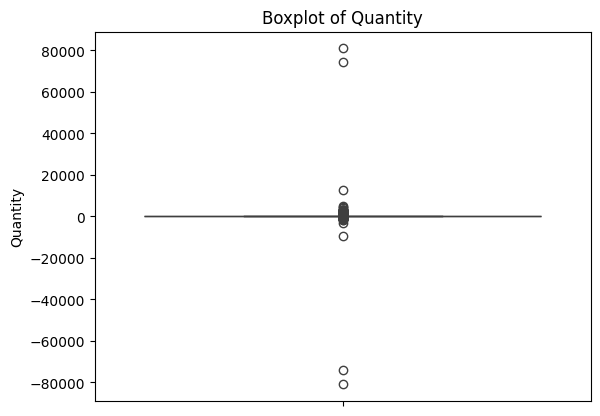

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(data['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

In [19]:
# removing ouliers where  0>quantity>10000

data = data.drop(data[(data['Quantity'] < 0) | (data['Quantity'] > 10000)].index)



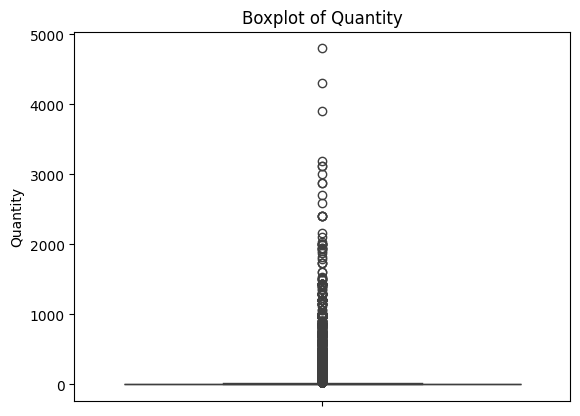

In [20]:

sns.boxplot(data['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011,4.15,12680.0,France


###### **Checking outliers in UnitPrice**

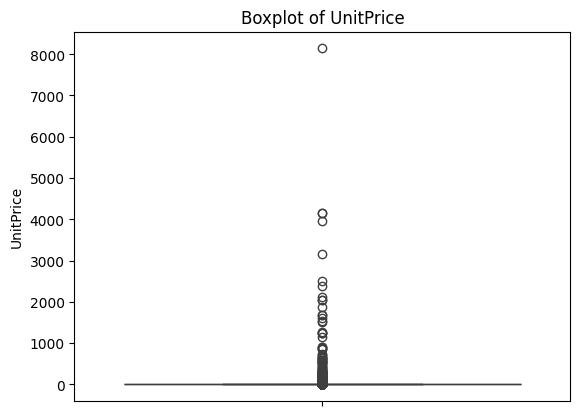

In [21]:
from matplotlib import pyplot as plt

sns.boxplot(data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

In [22]:
data["UnitPrice"].describe(percentiles=[0.95,0.99,0.999])


count    397921.00000
mean          3.11619
std          22.09687
min           0.00000
50%           1.95000
95%           8.50000
99%          14.95000
99.9%        41.84600
max        8142.75000
Name: UnitPrice, dtype: float64

In [ ]:
# removing rows where unit price is greater than 3000 - in real world unitprice cant be that high like- 8142 for gift items

data=data.drop(data[data['UnitPrice'] > 3000].index)


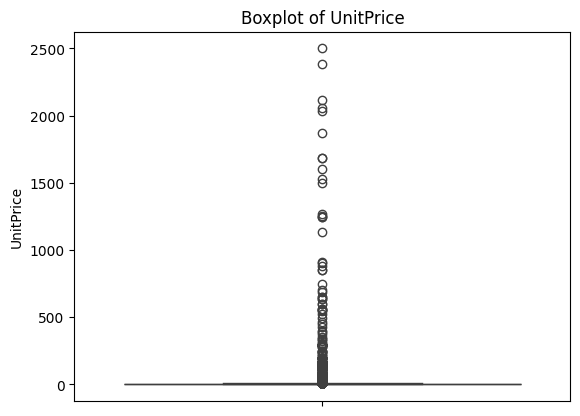

In [28]:
from matplotlib import pyplot as plt

sns.boxplot(data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397916 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397916 non-null  object 
 1   StockCode    397916 non-null  object 
 2   Description  397916 non-null  object 
 3   Quantity     397916 non-null  int64  
 4   InvoiceDate  397916 non-null  object 
 5   UnitPrice    397916 non-null  float64
 6   CustomerID   397916 non-null  float64
 7   Country      397916 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [30]:
data['CustomerID']=data['CustomerID'].astype(int) #convert the data type from float to int

In [32]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406658 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406658 non-null  object        
 1   StockCode    406658 non-null  object        
 2   Description  406658 non-null  object        
 3   Quantity     406658 non-null  int64         
 4   InvoiceDate  406658 non-null  datetime64[ns]
 5   UnitPrice    406658 non-null  float64       
 6   CustomerID   406658 non-null  int64         
 7   Country      406658 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [33]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### As out data is prepared, now adding the Revenue column

In [34]:
data['Revenue']=data['Quantity'] * data['UnitPrice']

data['Revenue']=data['Revenue'].round(2)

###### **filter data only rows with 0 < UnitPrice and with reasonable transaction quantities > 0**

In [35]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] >= 0)]

In [36]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60


In [ ]:
# export cleaned data
data.to_csv("cleaned_retail.csv", index=False, sep='|')